<a href="https://colab.research.google.com/github/loongst/Machine_Learning/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


[[2 0 0]
 [0 0 1]
 [1 1 1]]


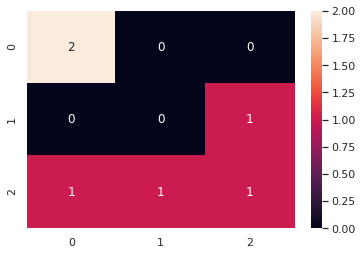

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
y_true = ["cat", "dog", "cat", "cat", "dog", "rebit"]
y_pred = ["dog", "dog", "rebit", "cat", "dog", "cat"]
C2= confusion_matrix(y_true, y_pred, labels=["dog", "rebit", "cat"])
print(C2)
sns.heatmap(C2,annot=True)

In [ ]:
!pip install transformers
from transformers import BertForSequenceClassification

     |████████████████████████████████| 2.0MB 5.0MB/s 
     |████████████████████████████████| 890kB 23.0MB/s 
     |████████████████████████████████| 3.2MB 33.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=b705f132f167ded6ac3181259b66155d006fb11846a259b34e0d4ee0713ace5a
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
from transformers.optimization import AdamW

In [ ]:
import os
os.listdir('./drive/MyDrive/DUTA')
os.chdir('./drive/MyDrive/DUTA')

In [ ]:
os.listdir('data')

['Onion_Dataset_labled_clean',
 'labels.csv',
 'result',
 'labels_filtered.csv',
 'DUTA_cleaned.csv',
 'bert_train.csv',
 'bert_dev.csv',
 'bert_test.csv',
 'ppp.csv']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
data=pd.read_csv('./data/DUTA_cleaned.csv')

In [ ]:
data.head()

,Onion_Address,Main_Class,Sub_Class,lang,content
0,rothminr5wgew3f4.onion,Counterfeit Credit-Cards,NaN,en,Selling EU/US cloned cards Please put your ID ...
1,bj34sdmkveikr5bm.onion,Counterfeit Credit-Cards,NaN,en,"Info for regular costumers Please, don't forge..."
2,ccsale4qgjgnt4xi.onion,Counterfeit Credit-Cards,NaN,en,"To order a credit card, send us a message on c..."
3,deepwebmulipliao.onion,Counterfeit Credit-Cards,NaN,en,Cards that we've loaded with funds from variou...
4,pay73qh2hrmj5ksm.onion,Counterfeit Credit-Cards,NaN,en,Thank you for your order! Step 1: send the cor...


In [ ]:
data['Main_Class'].factorize()[0]

array([0, 0, 0, ..., 7, 7, 7])

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

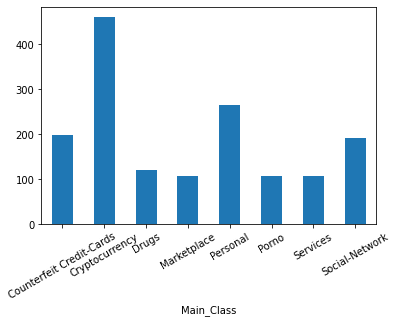

In [ ]:
plt.figure()
data.groupby("Main_Class").content.count().plot.bar()
# plt.tight_layout()
plt.xticks(rotation=30)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data['content'],data['Main_Class'],random_state=0,shuffle=True)
X_train

241     Get 100x return on Bitcoin investment! How can...
1182    Escorts in Scotland V and.com/ England .escort...
330     How to multiply your Bitcoins hundredfold in a...
915     Welcome to the Marilyn Style Shop! In the mean...
717     Coffee Shop grade Cannabis Finest organic cann...
                              ...                        
763     Welcome to onion CandyShop candy2lnw4px2yfp We...
835     How can I buy products from your website? You ...
1216    Please help us to run our server and donate Bi...
559     Not logged in :: LOGIN / REGISTER Bitcoin Fog ...
684     I am a Hash Seller from the paradise like city...
Name: content, Length: 1169, dtype: object

In [ ]:
vec=TfidfVectorizer(lowercase=True,stop_words='english')

In [ ]:
X_train_tfidf=vec.fit_transform(X_train)


In [ ]:
X_test_tfidf=vec.transform(X_test)

SVM result:


array([[ 48,   0,   0,   0,   1,   0,   0,   0],
       [  0, 111,   0,   1,   3,   0,   1,   2],
       [  0,   0,  25,   0,   0,   0,   1,   0],
       [  1,   0,   0,  17,   3,   0,   0,   0],
       [  1,   1,   0,   0,  65,   0,   2,  11],
       [  0,   0,   0,   0,   2,  22,   1,   1],
       [  0,   2,   0,   0,  10,   0,   3,   5],
       [  1,   0,   0,   0,  14,   2,   1,  32]])

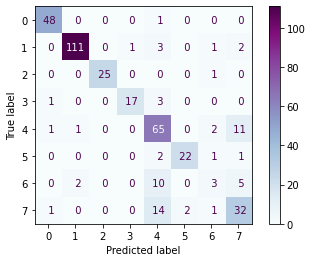

In [ ]:
model_svm=svm.LinearSVC()
model_svm.fit(X_train_tfidf,y_train)
y_pred_svm=model_svm.predict(X_test_tfidf)
plot_confusion_matrix(model_svm,X_test_tfidf, y_test,display_labels=[x for x in range(8)],
                                 cmap=plt.cm.BuPu,
                                 normalize=None,
                                 values_format='3d')
conf_mat_SVM = confusion_matrix(y_test, y_pred_svm)
print("SVM result:")
conf_mat_SVM

In [ ]:
ret=metrics.classification_report(y_test, y_pred_svm, target_names=data['Main_Class'].unique(), digits=4)
print(ret)

                          precision    recall  f1-score   support

Counterfeit Credit-Cards     0.9412    0.9796    0.9600        49
          Cryptocurrency     0.9737    0.9407    0.9569       118
                   Drugs     1.0000    0.9615    0.9804        26
             Marketplace     0.9444    0.8095    0.8718        21
                Personal     0.6633    0.8125    0.7303        80
                   Porno     0.9167    0.8462    0.8800        26
                Services     0.3333    0.1500    0.2069        20
          Social-Network     0.6275    0.6400    0.6337        50

                accuracy                         0.8282       390
               macro avg     0.8000    0.7675    0.7775       390
            weighted avg     0.8251    0.8282    0.8228       390



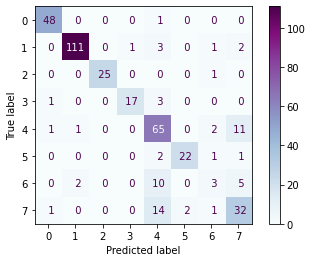

In [ ]:


# ret=metrics.classification_report(y_test, y_pred_svm, target_names=data['Main_Class'].unique(), digits=4)
# print(ret)

SVM result:


array([[ 48,   0,   0,   0,   1,   0,   0,   0],
       [  0, 111,   0,   1,   3,   0,   1,   2],
       [  0,   0,  25,   0,   0,   0,   1,   0],
       [  1,   0,   0,  17,   3,   0,   0,   0],
       [  1,   1,   0,   0,  65,   0,   2,  11],
       [  0,   0,   0,   0,   2,  22,   1,   1],
       [  0,   2,   0,   0,  10,   0,   3,   5],
       [  1,   0,   0,   0,  14,   2,   1,  32]])